In [148]:
import pandas as pd
import os
import numpy as np

In [149]:
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset")

In [150]:
airpas=pd.read_csv("AirPassengers (1).csv")

In [151]:
airpass.shape

(144, 2)

In [152]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [154]:
airpas.Month=pd.to_datetime(airpas.Month,infer_datetime_format=True)

In [155]:
ind_airpas=airpas.set_index(["Month"])

In [156]:
ind_airpas.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [157]:
ind_airpas.shape

(144, 1)

In [158]:
ind_airpas.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [159]:
ind_airpas.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [160]:
import matplotlib.pyplot as plt

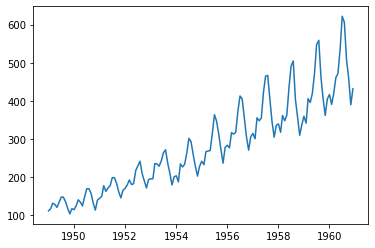

In [161]:
plt.plot(ind_airpas);

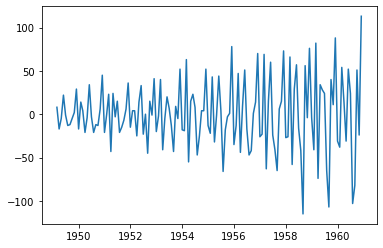

In [162]:
plt.plot(ind_airpas.diff().diff())

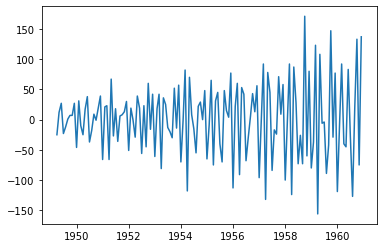

In [163]:
plt.plot(ind_airpas.diff().diff().diff())

In [164]:
### evev after doing more than 10 times series was not stationary 
## take log now

In [165]:
ind_airpas_log=np.log(ind_airpas)

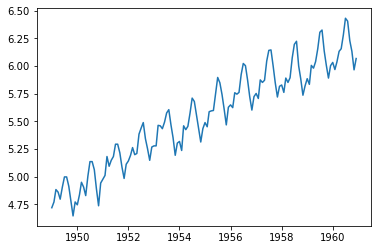

In [166]:
plt.plot(ind_airpas_log)   ## is it stationary noww?? NO

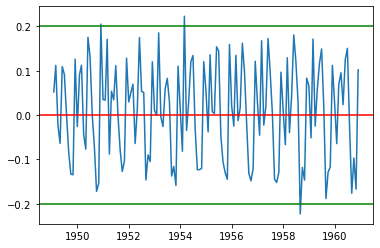

In [167]:
plt.plot(ind_airpas_log.diff())
plt.axhline(y=0,color="r")
plt.axhline(y=.2,color="g")
plt.axhline(y=-.2,color="g")

In [168]:
## after take log ,I(1 one level of diff)
## but my orignal series has change,now basa sreies is log
## mode would be bulido   the log so prediction also in log so at the end take the anti log

In [169]:
## but wht ever values u get from ACF and PCAF are not binding

In [170]:
from statsmodels.tsa.stattools import acf,pacf


In [171]:
from statsmodels.tsa.arima_model import ARIMA

In [172]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf


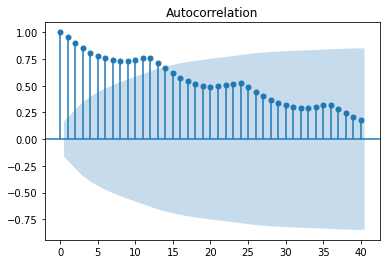

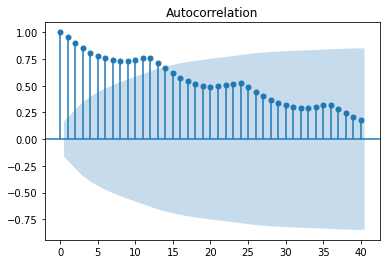

In [173]:
plot_acf(ind_airpas_log.Passengers,lags=40)

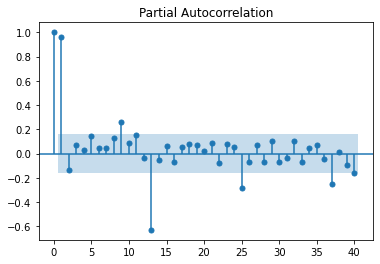

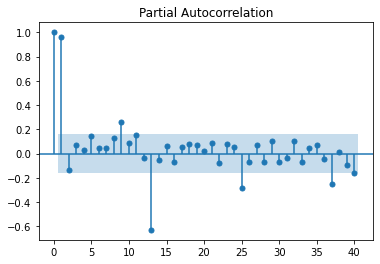

In [174]:
plot_pacf(ind_airpas_log.Passengers,lags=40)

In [175]:
## in pacf graph after 2nd lag value are sudden decline ,so PA =2 ,
## in acf graph even change the lag no sudden change  so MA=0.

In [176]:
model=ARIMA(ind_airpas_log,order=(2,1,0))
result=model.fit();

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [177]:
result.params

const                 0.009600
ar.L1.D.Passengers    0.235864
ar.L2.D.Passengers   -0.172474
dtype: float64

In [178]:
result.forecast(steps=12) ## its will do tne forecsst for the next 12 month

(array([6.13038726, 6.13635264, 6.13606414, 6.14395848, 6.15486148,
        6.1650628 , 6.1745797 , 6.18405618, 6.19364119, 6.20325876,
        6.21286529, 6.2224636 ]),
 array([0.10248369, 0.16292524, 0.1992398 , 0.2264801 , 0.25095755,
        0.27376968, 0.29490959, 0.31457335, 0.33305176, 0.35056067,
        0.36724061, 0.38319577]),
 array([[5.92952292, 6.3312516 ],
        [5.81702503, 6.45568025],
        [5.74556132, 6.52656697],
        [5.70006564, 6.58785131],
        [5.66299372, 6.64672924],
        [5.62848408, 6.70164152],
        [5.59656752, 6.75259187],
        [5.56750375, 6.80060862],
        [5.54087173, 6.84641064],
        [5.51617246, 6.89034505],
        [5.49308692, 6.93264365],
        [5.47141369, 6.97351351]]))

In [179]:
fore_values=result.forecast(steps=12) ## its will do tne forecsst for the next 12 month

In [180]:
fore_values[0]   ##prediction in log

array([6.13038726, 6.13635264, 6.13606414, 6.14395848, 6.15486148,
       6.1650628 , 6.1745797 , 6.18405618, 6.19364119, 6.20325876,
       6.21286529, 6.2224636 ])

In [181]:
np.exp(fore_values[0])   ##prediction in original scale(by taking antilog) 

array([459.61411521, 462.36408201, 462.23071202, 465.89415735,
       471.00159531, 475.8310231 , 480.38107493, 484.95503956,
       489.62568356, 494.35740882, 499.12935332, 503.94321852])

In [182]:
np.round(np.exp(fore_values[0]) )  ##prediction in original scale(by taking antilog) 

array([460., 462., 462., 466., 471., 476., 480., 485., 490., 494., 499.,
       504.])

In [183]:
## can i find the error?? NO
## bcoz forecast is for the future value  abd we do not have the actual values for 


In [184]:
## we can not random sampling but we do sequention sampling 
## bulid the model till 1995 abd do forecast on 1960

In [185]:
## code for plot 

In [186]:
forecast_values=result.forecast(steps=12)


In [187]:
forecast_values_df=pd.DataFrame(forecast_values[0])
forecast_values_df=np.exp(forecast_values_df)
forecast_values_df

,0
0,459.614115
1,462.364082
2,462.230712
3,465.894157
4,471.001595
5,475.831023
6,480.381075
7,484.955040
8,489.625684
9,494.357409


In [188]:
forecast_values_df.rename(columns={forecast_values_df.columns[0]:"predicted" },inplace=True)

In [189]:
## forecast_values_df

In [190]:
date_for_pred=[""]

In [191]:
forecast_values_df

,predicted
0,459.614115
1,462.364082
2,462.230712
3,465.894157
4,471.001595
5,475.831023
6,480.381075
7,484.955040
8,489.625684
9,494.357409


In [192]:
date_for_pred=["1961-01-01","1961-02-01","1961-03-01","1961-04-01","1961-05-01",
               "1961-06-01","1961-07-01","1961-08-01","1961-09-01","1961-10-01","1961-11-01","1961-12-01"]

In [193]:
forecast_values_df=pd.concat([forecast_values_df,pd.Series(date_for_pred)],axis=1)
forecast_values_df

,predicted,0
0,459.614115,1961-01-01
1,462.364082,1961-02-01
2,462.230712,1961-03-01
3,465.894157,1961-04-01
4,471.001595,1961-05-01
5,475.831023,1961-06-01
6,480.381075,1961-07-01
7,484.955040,1961-08-01
8,489.625684,1961-09-01
9,494.357409,1961-10-01


In [194]:
forecast_values_df.rename(columns={forecast_values_df.columns[1]:"Month" },inplace=True)

In [195]:
forecast_values_df.Month=pd.to_datetime(forecast_values_df.Month,infer_datetime_format=True)
forecast_values_df

,predicted,Month
0,459.614115,1961-01-01
1,462.364082,1961-02-01
2,462.230712,1961-03-01
3,465.894157,1961-04-01
4,471.001595,1961-05-01
5,475.831023,1961-06-01
6,480.381075,1961-07-01
7,484.955040,1961-08-01
8,489.625684,1961-09-01
9,494.357409,1961-10-01


In [196]:
pred_airpas=forecast_values_df.set_index(["Month"])
pred_airpas.head()

,predicted
Month,
1961-01-01,459.614115
1961-02-01,462.364082
1961-03-01,462.230712
1961-04-01,465.894157
1961-05-01,471.001595


AttributeError: 'Line2D' object has no property 'coler'

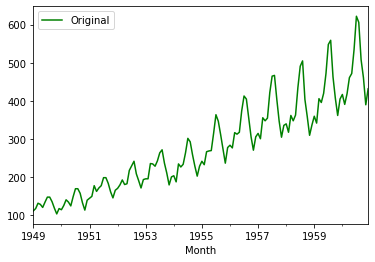

In [197]:
ind_airpas["Passengers"].plot(legend=True,label="Original",color="green")
pred_airpas["predicted"].plot(legend=True,label="predicted",coler="red")